# Company Bankruptcy Case

### Description

This classification task is based on the Kaggle dataset: <a href=https://www.kaggle.com/datasets/fedesoriano/company-bankruptcy-prediction >Company Bankruptcy Prediction *Bankruptcy data from the Taiwan Economic Journal for the years 1999–2009*</a>. The dataset is under public domain license (v10.0).

---
### Table of contents

1. [Dataset](#dataset)
2. [EDA](#eda)
3. [Data preparation](#preparation)
   1. [PCA](#pca)
   2. [Feature Importance](#mi)
   3. [Under/Over-sampling](#sampling)
4. [Classification](#classification)
    1. [Keras CNN](#cnn)
    2. [RandomForest](#rf)
    3. [XGB](#xgb)
    4. [CatBoost](#catboost)
    5. [SVC](#svc)
    6. [KNN](#knn)
5. [Model Comparison](#comparison)

## 1.Dataset

### Features:

Y - Bankrupt?: Class label

- X1 - ROA(C) before interest and depreciation before interest: Return On Total Assets(C)
- X2 - ROA(A) before interest and % after tax: Return On Total Assets(A)
- X3 - ROA(B) before interest and depreciation after tax: Return On Total Assets(B)
- X4 - Operating Gross Margin: Gross Profit/Net Sales
- X5 - Realized Sales Gross Margin: Realized Gross Profit/Net Sales
- X6 - Operating Profit Rate: Operating Income/Net Sales
- X7 - Pre-tax net Interest Rate: Pre-Tax Income/Net Sales
- X8 - After-tax net Interest Rate: Net Income/Net Sales
- X9 - Non-industry income and expenditure/revenue: Net Non-operating Income Ratio
- X10 - Continuous interest rate (after tax): Net Income-Exclude Disposal Gain or Loss/Net Sales
- X11 - Operating Expense Rate: Operating Expenses/Net Sales
- X12 - Research and development expense rate: (Research and Development Expenses)/Net Sales
- X13 - Cash flow rate: Cash Flow from Operating/Current Liabilities
- X14 - Interest-bearing debt interest rate: Interest-bearing Debt/Equity
- X15 - Tax rate (A): Effective Tax Rate
- X16 - Net Value Per Share (B): Book Value Per Share(B)
- X17 - Net Value Per Share (A): Book Value Per Share(A)
- X18 - Net Value Per Share (C): Book Value Per Share(C)
- X19 - Persistent EPS in the Last Four Seasons: EPS-Net Income
- X20 - Cash Flow Per Share
- X21 - Revenue Per Share (Yuan ¥): Sales Per Share
- X22 - Operating Profit Per Share (Yuan ¥): Operating Income Per Share
- X23 - Per Share Net profit before tax (Yuan ¥): Pretax Income Per Share
- X24 - Realized Sales Gross Profit Growth Rate
- X25 - Operating Profit Growth Rate: Operating Income Growth
- X26 - After-tax Net Profit Growth Rate: Net Income Growth
- X27 - Regular Net Profit Growth Rate: Continuing Operating Income after Tax Growth
- X28 - Continuous Net Profit Growth Rate: Net Income-Excluding Disposal Gain or Loss Growth
- X29 - Total Asset Growth Rate: Total Asset Growth
- X30 - Net Value Growth Rate: Total Equity Growth
- X31 - Total Asset Return Growth Rate Ratio: Return on Total Asset Growth
- X32 - Cash Reinvestment %: Cash Reinvestment Ratio
- X33 - Current Ratio
- X34 - Quick Ratio: Acid Test
- X35 - Interest Expense Ratio: Interest Expenses/Total Revenue
- X36 - Total debt/Total net worth: Total Liability/Equity Ratio
- X37 - Debt ratio %: Liability/Total Assets
- X38 - Net worth/Assets: Equity/Total Assets
- X39 - Long-term fund suitability ratio (A): (Long-term Liability+Equity)/Fixed Assets
- X40 - Borrowing dependency: Cost of Interest-bearing Debt
- X41 - Contingent liabilities/Net worth: Contingent Liability/Equity
- X42 - Operating profit/Paid-in capital: Operating Income/Capital
- X43 - Net profit before tax/Paid-in capital: Pretax Income/Capital
- X44 - Inventory and accounts receivable/Net value: (Inventory+Accounts Receivables)/Equity
- X45 - Total Asset Turnover
- X46 - Accounts Receivable Turnover
- X47 - Average Collection Days: Days Receivable Outstanding
- X48 - Inventory Turnover Rate (times)
- X49 - Fixed Assets Turnover Frequency
- X50 - Net Worth Turnover Rate (times): Equity Turnover
- X51 - Revenue per person: Sales Per Employee
- X52 - Operating profit per person: Operation Income Per Employee
- X53 - Allocation rate per person: Fixed Assets Per Employee
- X54 - Working Capital to Total Assets
- X55 - Quick Assets/Total Assets
- X56 - Current Assets/Total Assets
- X57 - Cash/Total Assets
- X58 - Quick Assets/Current Liability
- X59 - Cash/Current Liability
- X60 - Current Liability to Assets
- X61 - Operating Funds to Liability
- X62 - Inventory/Working Capital
- X63 - Inventory/Current Liability
- X64 - Current Liabilities/Liability
- X65 - Working Capital/Equity
- X66 - Current Liabilities/Equity
- X67 - Long-term Liability to Current Assets
- X68 - Retained Earnings to Total Assets
- X69 - Total income/Total expense
- X70 - Total expense/Assets
- X71 - Current Asset Turnover Rate: Current Assets to Sales
- X72 - Quick Asset Turnover Rate: Quick Assets to Sales
- X73 - Working capitcal Turnover Rate: Working Capital to Sales
- X74 - Cash Turnover Rate: Cash to Sales
- X75 - Cash Flow to Sales
- X76 - Fixed Assets to Assets
- X77 - Current Liability to Liability
- X78 - Current Liability to Equity
- X79 - Equity to Long-term Liability
- X80 - Cash Flow to Total Assets
- X81 - Cash Flow to Liability
- X82 - CFO to Assets
- X83 - Cash Flow to Equity
- X84 - Current Liability to Current Assets
- X85 - Liability-Assets Flag: 1 if Total Liability exceeds Total Assets, 0 otherwise
- X86 - Net Income to Total Assets
- X87 - Total assets to GNP price
- X88 - No-credit Interval
- X89 - Gross Profit to Sales
- X90 - Net Income to Stockholder's Equity
- X91 - Liability to Equity
- X92 - Degree of Financial Leverage (DFL)
- X93 - Interest Coverage Ratio (Interest expense to EBIT)
- X94 - Net Income Flag: 1 if Net Income is Negative for the last two years, 0 otherwise
- X95 - Equity to Liability

## 2. EDA

In [404]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras 
from sklearn.decomposition import PCA
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, accuracy_score,precision_score,recall_score
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.svm import SVC
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest

In [405]:
df = pd.read_csv("data//data.csv")

In [406]:
print(pd.isnull(df).sum().sort_values())

Bankrupt?                                 0
 Total income/Total expense               0
 Retained Earnings to Total Assets        0
 Long-term Liability to Current Assets    0
 Current Liabilities/Equity               0
                                         ..
 Regular Net Profit Growth Rate           0
 After-tax Net Profit Growth Rate         0
 Operating Profit Growth Rate             0
 Net Income Flag                          0
 Equity to Liability                      0
Length: 96, dtype: int64


Dataset has no Nan values.

0    6599
1     220
Name: Bankrupt?, dtype: int64


<BarContainer object of 2 artists>

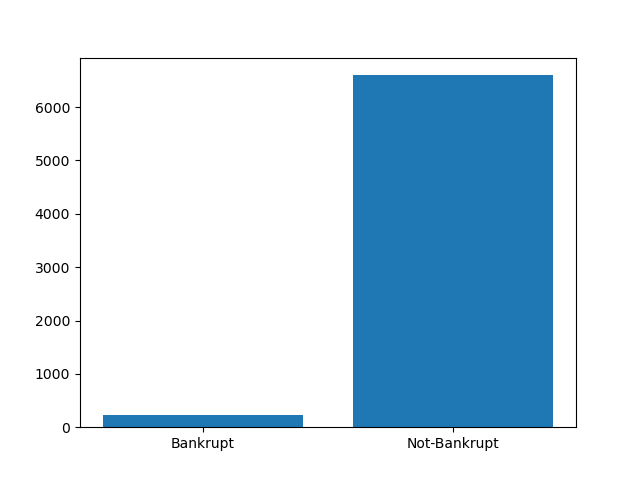

In [407]:
print(df["Bankrupt?"].value_counts())
fig = plt.figure()
plt.bar(["Bankrupt","Not-Bankrupt"],[len(df[df["Bankrupt?"] == 1]),len(df[df["Bankrupt?"] == 0])])

The dataset is imbalanced, as there are 6599 samples from non-bankrupt and 220 from bankrupt corporations.

In [408]:
corr_mat = df.corr()

mat1 = corr_mat[corr_mat>0.5]
mat2 = corr_mat[corr_mat<-0.2]
mask=np.triu(corr_mat)

sns.heatmap(mat1,mask=mask,annot=False)

<AxesSubplot:>

Many of the features are intrinsically correlated, which could help with dimensionality reduction (see [PCA](#pca))

## Distribution of data

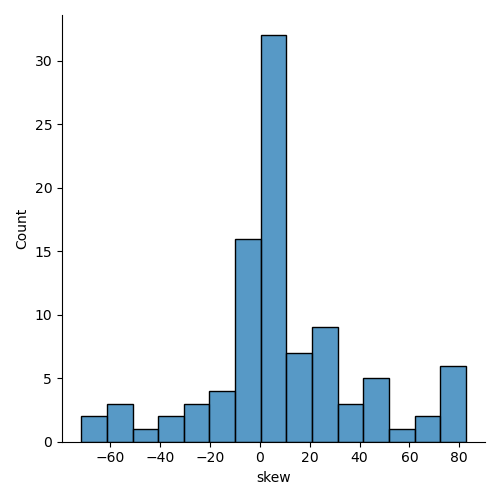

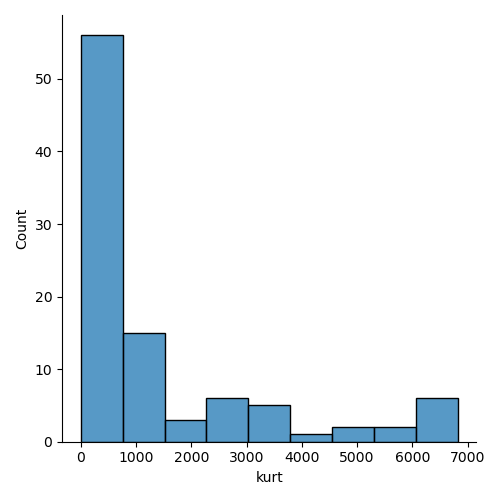

In [409]:
desc_df =df.copy()
skew_vals =[]
kurt_vals =[]
for c in desc_df.columns:
    
    skew_vals.append( desc_df[c].skew())
    kurt_vals.append(desc_df[c].kurt())
desc_df = desc_df.T
desc_df["skew"] = skew_vals
desc_df["kurt"] = kurt_vals
sns.displot(desc_df["skew"])
sns.displot(desc_df["kurt"])

There is high skewness and kurtosis in the distribution of most features.

## 3. Data Preparation

#### 3.1 PCA

In [410]:
pca = PCA(n_components=3)
pca_mat = pca.fit_transform(df)
pca_df = pd.DataFrame(data=pca_mat, columns=["feature1","feature2","feature3"])

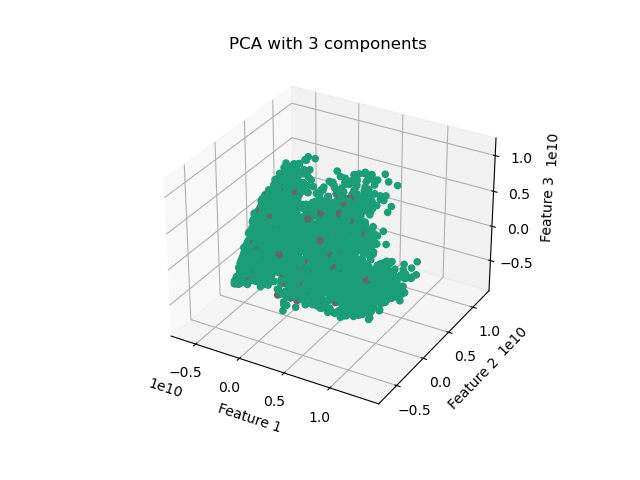

In [411]:
%matplotlib widget
xs=pca_df["feature1"]
ys=pca_df["feature2"]
zs=pca_df["feature3"]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(xs, ys, zs,alpha=1,c=df["Bankrupt?"],cmap="Dark2")

ax.set_title("PCA with 3 components")
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
plt.show()

In [412]:
from sklearn.model_selection import train_test_split
y = df.pop("Bankrupt?")
X = df
X_train, X_test,y_train, y_test = train_test_split(X,y, test_size=0.2)


In [413]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)
print(X.shape,y.shape)

(5455, 95) (5455,) (1364, 95) (1364,)
(6819, 95) (6819,)


#### 3.2 Feature Importance

In [414]:
mutual_inf = mutual_info_classif(X_train,y_train)
mi = pd.Series(mutual_inf)
mi.index = df.columns
top_features = mi.sort_values(ascending=False)[:15]
sel_ = SelectKBest(mutual_info_classif, k=10).fit(X_train, y_train)
X_train.columns[sel_.get_support()]


Index([' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Persistent EPS in the Last Four Seasons',
       ' Per Share Net profit before tax (Yuan ¥)', ' Interest Expense Ratio',
       ' Debt ratio %', ' Net worth/Assets', ' Borrowing dependency',
       ' Net profit before tax/Paid-in capital',
       ' Net Income to Stockholder's Equity'],
      dtype='object')

In [415]:
X_train = sel_.transform(X_train)
X_test = sel_.transform(X_test)

#### 3.3 Under/Over Sampling

In [416]:
under_sampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = under_sampler.fit_resample(X_train,y_train)
print(X_train_under.shape,y_train_under.shape)

(344, 10) (344,)


In [417]:
over_sampler = RandomOverSampler(random_state=42)
X_train_over, y_train_over = over_sampler.fit_resample(X_train,y_train)
print(X_train_over.shape,y_train_under.shape)

(10566, 10) (344,)


In [418]:
pca_over = PCA(n_components=3)
pca_mat_over = pca_over.fit_transform(X_train_over)

pca_under = PCA(n_components=3)
pca_mat_under = pca_under.fit_transform(X_train_under)

pca_over_df = pd.DataFrame(pca_mat_over,columns= ["Feature 1","Feature 2","Feature 3"])
pca_under_df = pd.DataFrame(pca_mat_under,columns= ["Feature 1","Feature 2","Feature 3"])

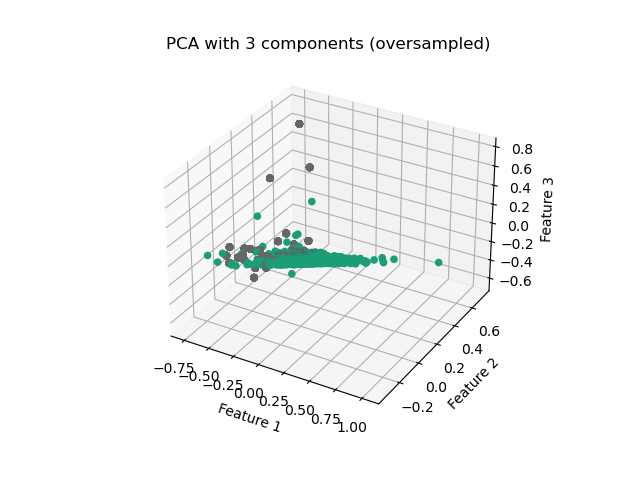

In [419]:
%matplotlib widget
xs=pca_over_df["Feature 1"]
ys=pca_over_df["Feature 2"]
zs=pca_over_df["Feature 3"]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(xs, ys, zs,alpha=1,c=y_train_over,cmap="Dark2")

ax.set_title("PCA with 3 components (oversampled)")
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
plt.show()

### 4. Classification

#### 4.1. CNN keras

In [420]:
normalizer = tf.keras.layers.Normalization(axis=None)

model= tf.keras.Sequential([
    normalizer,
  tf.keras.layers.Dense(32, activation="relu"),
  tf.keras.layers.Dense(16, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

model.compile(loss="binary_crossentropy", 
              optimizer="Adam",
              metrics=["accuracy"]) 

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))
history = model.fit(X_train_over, 
                      y_train_over, 
                      epochs=50,
                      verbose=0,
                      callbacks=[lr_scheduler])
     

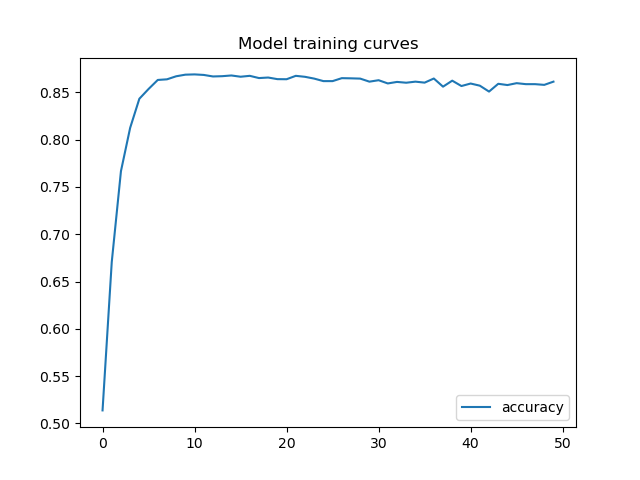

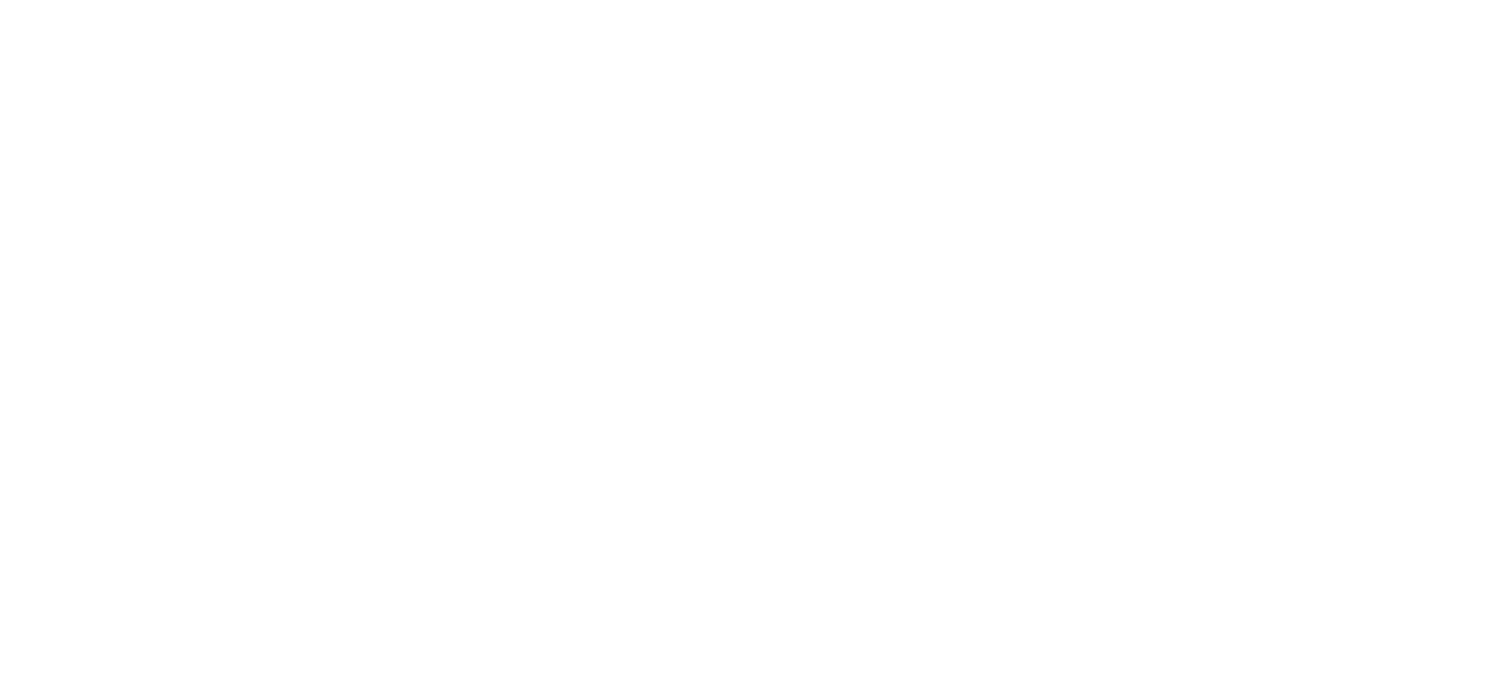

In [437]:
fig = plt.figure(figsize=(15,7))
pd.DataFrame(history.history["accuracy"]).plot()
plt.title("Model training curves")
plt.legend(["accuracy"])
plt.show()

In [422]:
scaler = StandardScaler()
X_train =scaler.fit_transform(X_train_over)
X_test = scaler.transform(X_test)
y_train= y_train_over

In [423]:
def get_scores(y_hat,y_true,model_name="model"):
    return {
        "model":model_name,
        "f1":f1_score(y_hat,y_true),
        "accuracy":accuracy_score(y_hat,y_true),
        "recall": recall_score(y_hat,y_true),
        "precision":precision_score(y_hat,y_true)
    }

#### 4.2 Random Forest estimator

In [424]:
rf_estimator = RandomForestClassifier()
rf_estimator.fit(X_train,y_train)
rf_pred = rf_estimator.predict(X_test)

RandomForestClassifier()

#### 4.3 XGBoost estimator

In [426]:
xgb_estimator = XGBClassifier()
xgb_estimator.fit(X_train,y_train)
xgb_pred = xgb_estimator.predict(X_test)

#### 4.4 CatBoost estimator

In [438]:
cb_estimator = CatBoostClassifier()
cb_estimator.fit(X_train,y_train,verbose=False)
cb_pred = cb_estimator.predict(X_test)

#### 4.5 SVM estimator

In [428]:
svc_estimator = SVC()
svc_estimator.fit(X_train,y_train)
svc_pred = svc_estimator.predict(X_test)

#### 4.6 KNN estimator

In [429]:
knn_estimator = KNeighborsClassifier()
knn_estimator.fit(X_train,y_train)
knn_pred = knn_estimator.predict(X_test)

## 5. Model comparison

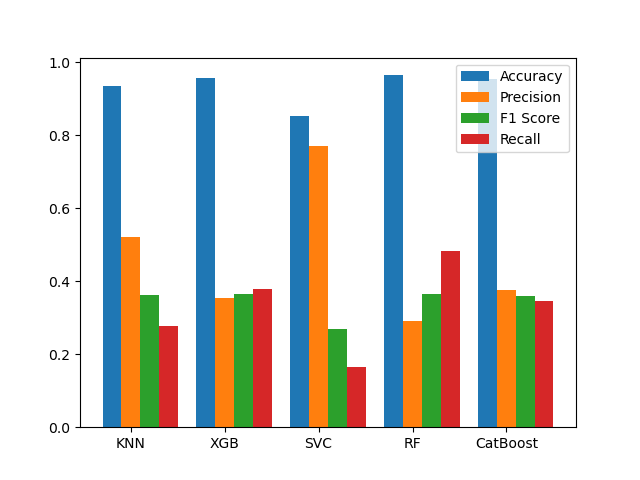

In [432]:
acc_scores = []
prec_scores = []
f1_scores = []
recall_scores = []

for pred in [knn_pred,xgb_pred,svc_pred,rf_pred,cb_pred]:
    acc_scores.append(get_scores(pred, y_test)["accuracy"])
    prec_scores.append(get_scores(pred, y_test)["precision"])
    f1_scores.append(get_scores(pred, y_test)["f1"])
    recall_scores.append(get_scores(pred, y_test)["recall"])
fig = plt.figure()

barWidth = 0.20
br1 = np.arange(len(acc_scores))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]



plt.bar(br1,acc_scores,width=barWidth,label="Accuracy")
plt.bar(br2,prec_scores,width=barWidth,label="Precision")
plt.bar(br3,f1_scores,width=barWidth,label="F1 Score")
plt.bar(br4,recall_scores,width=barWidth,label="Recall")
plt.xticks([r + barWidth for r in range(len(acc_scores))],
        ["KNN","XGB","SVC","RF","CatBoost"])
 
plt.legend()
plt.show()